In [66]:
import json
import urllib
import requests
import csv
import time

# Calculate the time and date for calcualtions so far

end = int(time.time())
start = end - 86400

print(start,end)

1690168109 1690254509


In [67]:
import datetime
from datetime import datetime
import dataFile

#
# Get data from the Tempest database for the new station
#

token = '877f6425-04a5-4f33-86e7-7123b7ef53d9'
protocol = 'https://'
urlSiteDevice = 'swd.weatherflow.com/swd/rest/observations/device/'
urlSiteStation = 'swd.weatherflow.com/swd/rest/observations/station/'
deviceID = '246921'
stationID = '95775'
preToken = '&token='
preStart = '?time_start='
preEnd = '&time_end='
start_time = start
end_time = end
dayOffset = '&day_offset=1'
format1 = '&format=csv'
print(start_time, end_time)
#
# Put it together
# 

goGetDeviceSummary = (f'{protocol}{urlSiteDevice}{deviceID}{preStart}{start_time}{preEnd}{end_time}{format1}{preToken}{token}')
print(goGetDeviceSummary)
r =  requests.get(goGetDeviceSummary)
#path_to_file = '/Users/jameshayes/'
path_to_file = '/home/ec2-user/'
full_file = (f'{path_to_file}latestTempestinfo.csv')

with open(full_file,'w') as fd:
     fd.write(r.text)

1690168109 1690254509
https://swd.weatherflow.com/swd/rest/observations/device/246921?time_start=1690168109&time_end=1690254509&format=csv&token=877f6425-04a5-4f33-86e7-7123b7ef53d9


In [68]:
import pandas as pd
import dataFile
import datetime
#from datetime import datetime
from dateutil.tz import tzutc, tzlocal
import pytz
import numpy as np

#
# Read in the CSV file for processing in pandas
#

path_to_file = '/home/ec2-user/'
full_file =(f'{path_to_file}latestTempestinfo.csv')
df = pd.read_csv(full_file, index_col=False)
df = df.drop(df.columns[[0,1,2,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24]], axis=1)

pd.set_option('display.max_rows', 1440)
pd.set_option('display.max_columns', 35)
pd.set_option('display.width', 1500)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

as3 = len(df) 
#print(as3)
timestamp = df['timestamp']
timezone = pytz.timezone("America/New_York")

with open(f'{path_to_file}outfile121.csv','w') as outfile: 

    i = 0
    while i < as3:
        try:
            timestamp = (df['timestamp'].loc[i])
            dt_object = datetime.datetime.fromtimestamp(timestamp)
            localT = dt_object.astimezone(timezone)
            lastTime = localT.strftime('%I:%M %p')  
            time24 = localT.strftime('%-H')  
            time24 = int(time24)
            fmT = (df['temperature'].loc[i])
            nextT = (fmT*1.8) + 32
            
            #print(i,lastTime,nextT)
            print(f'{lastTime},{nextT}', file = outfile)
            
            i += 1
        except:
            continue

1437
0 11:09 PM 75.74000000000001
1 11:10 PM 75.74000000000001
2 11:11 PM 75.74000000000001
3 11:12 PM 75.74000000000001
4 11:13 PM 75.74000000000001
5 11:14 PM 75.74000000000001
6 11:15 PM 75.74000000000001
7 11:16 PM 75.74000000000001
8 11:17 PM 75.74000000000001
9 11:18 PM 75.74000000000001
10 11:19 PM 75.56
11 11:20 PM 75.56
12 11:21 PM 75.56
13 11:22 PM 75.56
14 11:23 PM 75.56
15 11:24 PM 75.56
16 11:25 PM 75.56
17 11:26 PM 75.56
18 11:27 PM 75.56
19 11:28 PM 75.56
20 11:29 PM 75.56
21 11:30 PM 75.56
22 11:31 PM 75.38
23 11:32 PM 75.38
24 11:33 PM 75.38
25 11:34 PM 75.38
26 11:35 PM 75.38
27 11:36 PM 75.38
28 11:37 PM 75.38
29 11:38 PM 75.38
30 11:39 PM 75.2
31 11:40 PM 75.2
32 11:41 PM 75.2
33 11:42 PM 75.02
34 11:43 PM 75.02
35 11:44 PM 75.02
36 11:45 PM 75.02
37 11:46 PM 74.84
38 11:47 PM 74.84
39 11:48 PM 74.84
40 11:49 PM 74.84
41 11:50 PM 74.66
42 11:51 PM 74.66
43 11:52 PM 74.66
44 11:53 PM 74.66
45 11:54 PM 74.66
46 11:55 PM 74.48
47 11:56 PM 74.48
48 11:57 PM 74.48
49 11:

/Users/jameshayes/outfile121.csv
        Time    Temperature
0     11:09 PM     75.74   
1     11:10 PM     75.74   
2     11:11 PM     75.74   
3     11:12 PM     75.74   
4     11:13 PM     75.74   
5     11:14 PM     75.74   
6     11:15 PM     75.74   
7     11:16 PM     75.74   
8     11:17 PM     75.74   
9     11:18 PM     75.74   
10    11:19 PM     75.56   
11    11:20 PM     75.56   
12    11:21 PM     75.56   
13    11:22 PM     75.56   
14    11:23 PM     75.56   
15    11:24 PM     75.56   
16    11:25 PM     75.56   
17    11:26 PM     75.56   
18    11:27 PM     75.56   
19    11:28 PM     75.56   
20    11:29 PM     75.56   
21    11:30 PM     75.56   
22    11:31 PM     75.38   
23    11:32 PM     75.38   
24    11:33 PM     75.38   
25    11:34 PM     75.38   
26    11:35 PM     75.38   
27    11:36 PM     75.38   
28    11:37 PM     75.38   
29    11:38 PM     75.38   
30    11:39 PM     75.20   
31    11:40 PM     75.20   
32    11:41 PM     75.20   
33    11:42 PM 

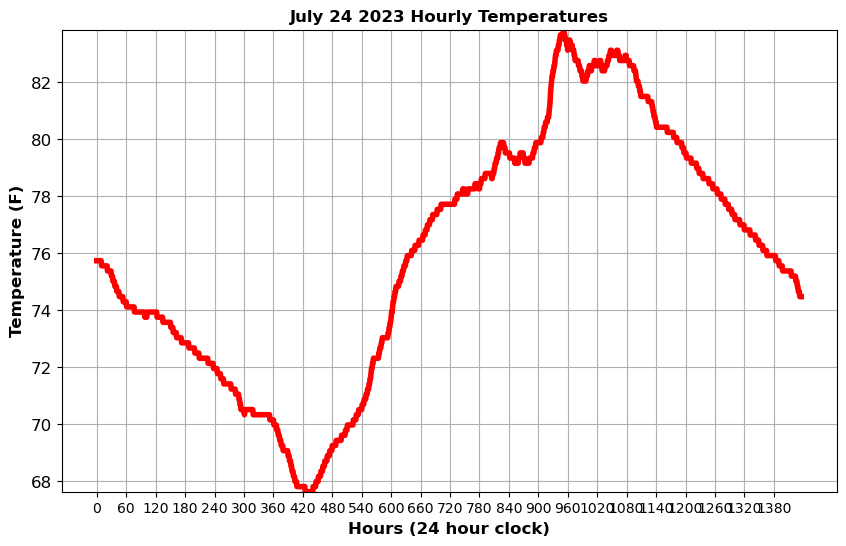

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import calcTimeNow
import getDaysInMonth
import getNameNumbers_ec1

# Defining some variables

new_path = '/home/ec2-user/'
finalFile = f'{new_path}outfile121.csv'
path1 = '/var/www/html/000/'    
print(finalFile)

# Get some variables from elsewhere

gg = getNameNumbers_ec1.tempest_ec2()

xls_filename, xls_fullfile, path_name, date, this_month, thisYear = gg[0], gg[1], gg[2], gg[3], gg[4], gg[5]
new_path = '/home/ec2-user/'


column_names = ['Time','Temperature']
df = pd.read_csv(finalFile, names = column_names)
xcd = df['Temperature']
rwe = df['Time']
y = xcd.to_numpy()

plt.figure(figsize= (10,6))
plt.yticks(fontsize=12)
plt.ylabel('Temperature (F)', fontsize=12, fontweight ='bold')

sas = (1440/24)
plt.xticks(np.arange(0,1440,sas))
plt.xlabel('Hours (24 hour clock)', fontsize=12, fontweight ='bold')

plt.title(f'Hourly Temperatures over the last 24 hours', fontsize=12, fontweight ='bold')
plt.plot(y,  color = "red", linewidth = 4, label ="Temperature")
plt.grid(True)
plt.autoscale(enable = True, axis = 'y', tight = True)

plt.savefig(f'{path1}testTToneMin')  